In [2]:
import os, requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.models import load_model, Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet101




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7f1Ywl5vd_ICWhvKKwYOi5mDjVrM-M189HV5-iYyORJsZepFxRwpY
Mounted at /content/drive


In [3]:
BUCKET = 9
IMAGE_SIZE = (224, 224)
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 64

In [4]:
gdrive_dir = "/content/drive/MyDrive"
working_dir = os.path.join(gdrive_dir, "CS3244 Project")
data_root_dir = os.path.join(working_dir, "landmarks/international/data_split")
data_dir = os.path.join(data_root_dir, str(BUCKET))
model_root_dir = os.path.join(working_dir, "models/KhengHun")


In [5]:
print('number of international labels:', len(os.listdir(data_dir)))

number of international labels: 200


In [6]:
#dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, interpolation="bilinear")

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255, 
    validation_split = VALIDATION_SPLIT,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    brightness_range = [0.9,1.1],
    fill_mode = 'nearest'
)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    subset = "training", 
    shuffle = True, 
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = VALIDATION_SPLIT
)
validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    subset = "validation", 
    shuffle = False, 
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 1371 images belonging to 200 classes.
Found 249 images belonging to 200 classes.


In [ ]:
#resnet_model = ResNet101();

In [ ]:
#resnet_model.summary()

In [ ]:
last_layer = resnet_model.get_layer("predictions")
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization(momentum=0.95, name="batch_norm_pre-output")(x)
x = layers.Dense(200, activation='softmax')(x)
model = Model(resnet_model.input, x)



In [ ]:
#save_model_dir = os.path.join(model_root_dir, "international1")
#model.save(save_model_dir)

In [ ]:
model.summary()

In [7]:
load_model_dir = os.path.join(model_root_dir, "finali9")
model = tf.keras.models.load_model(load_model_dir)

In [8]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ['accuracy']
)

steps_per_epoch = int(train_generator.samples / BATCH_SIZE)
validation_steps = int(validation_generator.samples / BATCH_SIZE)

print("Steps per epoch:", steps_per_epoch)
print("Validation steps:", validation_steps)

Steps per epoch: 21
Validation steps: 3


In [ ]:
model.summary()


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = validation_steps
)

save_model_dir = os.path.join(model_root_dir, "finali10")
model.save(save_model_dir)
df = pd.DataFrame(history.history)
hist_dir = os.path.join(model_root_dir, "history/finali10.csv")
df.to_csv(hist_dir)




Epoch 1/20
21/21 [==============================] - 694s 31s/step - loss: 7.2917 - accuracy: 0.0257 - val_loss: 7.0748 - val_accuracy: 0.0000e+00
Epoch 2/20
21/21 [==============================] - 54s 3s/step - loss: 4.2830 - accuracy: 0.2004 - val_loss: 4.7545 - val_accuracy: 0.1562
Epoch 3/20
21/21 [==============================] - 54s 3s/step - loss: 3.6650 - accuracy: 0.2971 - val_loss: 3.5618 - val_accuracy: 0.2917
Epoch 4/20
21/21 [==============================] - 54s 3s/step - loss: 3.1187 - accuracy: 0.3579 - val_loss: 3.2898 - val_accuracy: 0.3333
Epoch 5/20
21/21 [==============================] - 54s 3s/step - loss: 2.8674 - accuracy: 0.4019 - val_loss: 3.2802 - val_accuracy: 0.3542
Epoch 6/20
21/21 [==============================] - 55s 3s/step - loss: 2.6522 - accuracy: 0.4529 - val_loss: 3.5983 - val_accuracy: 0.3125
Epoch 7/20
21/21 [==============================] - 54s 3s/step - loss: 2.3699 - accuracy: 0.4987 - val_loss: 2.7371 - val_accuracy: 0.4062
Epoch 8/20
21/

In [ ]:
save_model_dir = os.path.join(model_root_dir, "international0")
model.save(save_model_dir)
df = pd.DataFrame(history.history)
hist_dir = os.path.join(model_root_dir, "history/int0.csv")
df.to_csv(hist_dir)

In [ ]:
model.summary()

Text(0.5, 1.0, 'Training and validation loss')

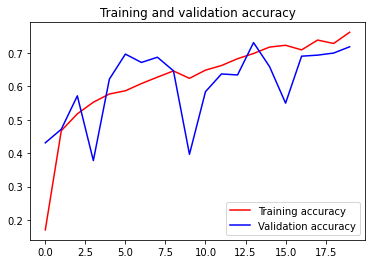

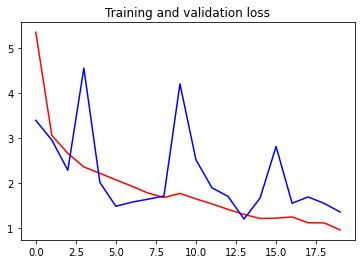

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
url = "https://i1.wp.com/couldhavestayedhome.com/wp-content/uploads/2019/09/Supertree-Grove-Gardens-by-the-Bay.jpeg?fit=1632%2C1224&ssl=1"

try:
  image_data = requests.get(url, stream=True).raw
except Exception as e:
  print('Warning: Could not download image from %s' % url)
  print('Error: %s' %e)
  raise

try:
  pil_image = Image.open(image_data)
except Exception as e:
  print('Warning: Failed to parse image')
  print('Error: %s' %e)
  raise

try:
  img = pil_image.convert('RGB').resize(IMAGE_SIZE)
except:
  print('Warning: Failed to format image')
  raise

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)
labels = list(train_generator.class_indices.keys())

for i in range(len(classes[0])):
  print("%s: %s" % (labels[i], classes[0][i]))

bugis: 0.0001477424
chinatown: 0.0008574759
clarke quay: 9.88118e-05
esplanade: 0.0014645697
flowerdome: 5.8766633e-05
flyer: 0.9965036
hajilane: 6.28524e-05
marinabaysands: 0.00054761226
merlion: 0.00016533508
supertree: 3.8481005e-05
uss: 5.4639208e-05
